
# NETFLIX STOCK PRICE PREDICTION USING LSTM 

# By Nnamdi Nwankwo
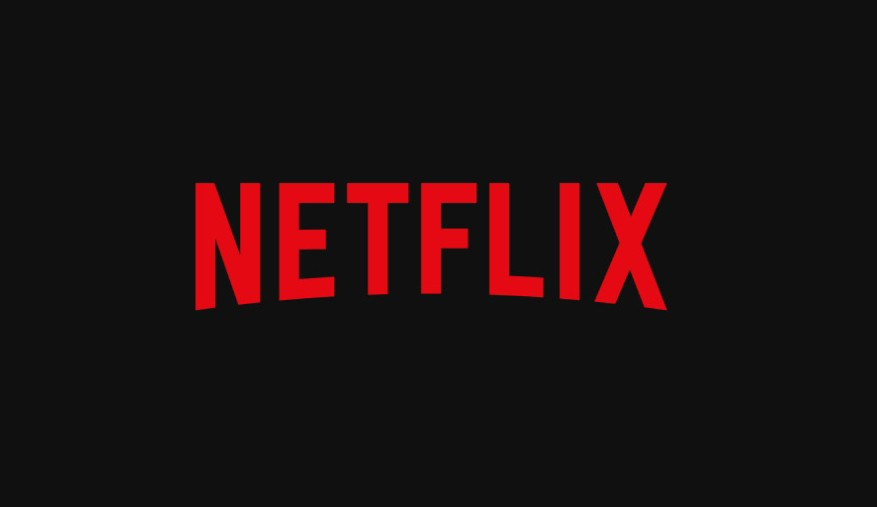

RNNs(Recurrent Neural Networks) are a class of neural networks designed for sequential data, LSTMs(Long short term Memory) are a specialized type of RNN that addresses some of the limitations of traditional RNNs, making them more effective for tasks involving long-term dependencies in data. LSTM cells have proven to be very useful in a wide range of applications, including text generation, speech recognition, and time series forecasting.

Objective: To predict the Netflix stock price using LSTM

# Importing the required libraries and loading the dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [60]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [61]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [63]:
NTFLX=pd.read_csv(r"C:\Users\CELEBOBO COMPUTERS\Downloads\Datasets\Nnamdi Datasc Projects\NFLX.csv")

In [64]:
NTFLX.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [65]:
NTFLX.shape

(1009, 7)

# Data Pre-processing

In [66]:
NTFLX_train=NTFLX.iloc[0:900]
NTFLX_test=NTFLX.iloc[900:1000]

# Train Data

In [67]:
train_set= NTFLX_train.iloc[:,1:2].values 
print(train_set[:5])

[[262.      ]
 [247.699997]
 [266.579987]
 [267.079987]
 [253.850006]]


In [68]:
#Normalizing the data/Feature Scaling
scaler = MinMaxScaler(feature_range = (0,1))
train_set_scaled = scaler.fit_transform(train_set)
print(train_set_scaled[:5])
print(train_set_scaled.shape)


[[0.08056696]
 [0.03953748]
 [0.09370782]
 [0.09514242]
 [0.05718305]]
(900, 1)


In [69]:
#Creating sequences for the data
x_train = []
y_train = []

#x_train is data during the past 60 days
#y_train is the data of the day after the last day of x_train

for i in range(60,len(train_set_scaled)):
    x_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [70]:
print(x_train.shape, y_train.shape)

(840, 60) (840,)


In [71]:
#reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print(x_train.shape)

(840, 60, 1)


# Model Building

In [72]:
#Initializing the RNN and adding the LSTM layers and some dropout regularisation
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

In [73]:
#Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
#training the model
model.fit(x_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
27/27 [==============================] - 9s 75ms/step - loss: 0.0446
Epoch 2/100
27/27 [==============================] - 2s 76ms/step - loss: 0.0122
Epoch 3/100
27/27 [==============================] - 2s 75ms/step - loss: 0.0105
Epoch 4/100
27/27 [==============================] - 2s 75ms/step - loss: 0.0095
Epoch 5/100
27/27 [==============================] - 2s 76ms/step - loss: 0.0080
Epoch 6/100
27/27 [==============================] - 2s 77ms/step - loss: 0.0092
Epoch 7/100
27/27 [==============================] - 2s 75ms/step - loss: 0.0080
Epoch 8/100
27/27 [==============================] - 2s 75ms/step - loss: 0.0093
Epoch 9/100
27/27 [==============================] - 2s 75ms/step - loss: 0.0096
Epoch 10/100
27/27 [==============================] - 2s 75ms/step - loss: 0.0084
Epoch 11/100
27/27 [==============================] - 2s 79ms/step - loss: 0.0075
Epoch 12/100
27/27 [==============================] - 2s 80ms/step - loss: 0.0078
Epoch 13/100
27/27 [=====

# Test Data

In [75]:
#getting the original stock price
original_stock_price= NTFLX_test.iloc[:,1:2].values 
print(original_stock_price[:5])

[[569.      ]
 [583.679993]
 [585.799988]
 [594.690002]
 [603.840027]]


# Inputing the last 60 data points of train data and test data to the model for prediction

In [76]:
#getting the predicted stock price
NTFLX_total = pd.concat((NTFLX_train['Open'],NTFLX_test['Open']),axis = 0)
inputs = NTFLX_total[len(NTFLX_total)-len(NTFLX_test)-60:].values
inputs = inputs.reshape(-1,1)

#MinMax scaling
sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.fit_transform(inputs)
print(inputs.shape)

(160, 1)


In [77]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(100, 60, 1)


In [78]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

4/4 [==============================] - 1s 25ms/step
(100, 1)


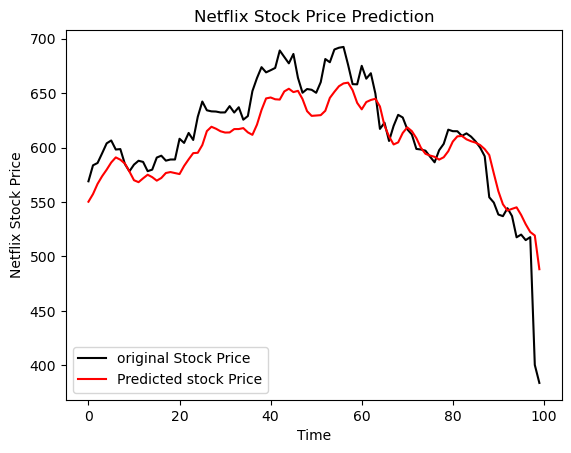

In [79]:
#Visualizing the results
plt.plot(original_stock_price,color = 'black', label = 'original Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted stock Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()
plt.show()

# Inputing the last 60 data points of train data only to the model, and appending each prediction to the input data for the next prediction

In [80]:
# Extract the last 60 data points from the 'Open' column
inputs = np.array(NTFLX_train['Open'][-60:])

# Initialize an array to store the predictions
new_predicted_price = np.empty((100, 1))

for i in range(100):
    # Reshape the input for prediction
    x = inputs[-60:].reshape(1, 60, 1)

    # Make the prediction
    pred = model.predict(x)

    # Append the prediction to the array
    new_predicted_price[i] = pred

    # Append the prediction to the input data for the next iteration
    inputs = np.append(inputs, pred)


1/1 [==============================] - 0s 23ms/step


In [81]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


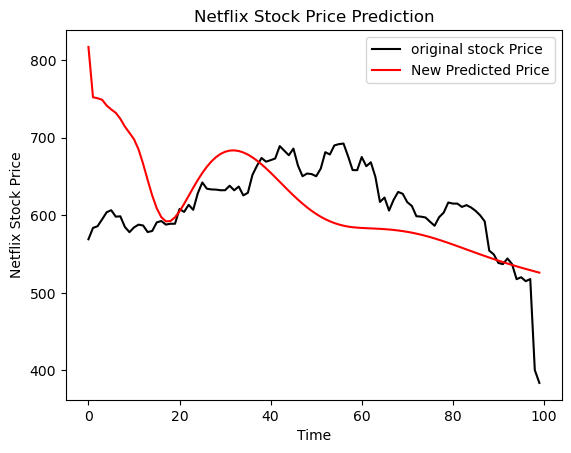

In [82]:
plt.plot(original_stock_price,color = 'black', label = 'original stock Price')
plt.plot(new_predicted_price, color = 'red', label = 'New Predicted Price')
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price') 
plt.legend()
plt.show()